# Department of Computing and Informatics, Faculty of Science and Technology, Bournemouth University.

# 1.Introduction

    

In an era of growing data complexity and volume, feature selection and construction techniques play a key role in understanding our data in helping reduce the dimensionality and improve learnability in data analytics problems. Both data and big data processing and analytics feature selection techniques are important for reducing the time required to build machine learning models and improving the performance of these algorithms. Moreover, principal component analysis is an important algorithm used in data and big data processing for the purpose of data visualisation, as well as for dimensionality reduction and for gaining insight in the knowledge hidden in the data

This machine learning (ML) program is carried out as a part of the final assignment of Data Processing and Analytics module.

# 2.Problem Definition








We need to identify the room ocupancy based on the give parameters



1.   Date
2.   Light occupancy
1.   Temperature
2.   CO2 level
1.   PIR







# 3.Objectives



Aim:
Our aim is to accurately predict room occupancy given the ......


Objectives:
1.  Study supervised learning techniques and chose ML algorithms
2.	Predicting the room occupancy of an activity given the paramters
3.	Identify most significant features for the decision.
4.	Apply domain expert knowledge to explain decisions.


# 4.Description of Data

The dataset contains 18 parameters and one label. The first row contains the column labels. The column labels are

Date,
Time,
S1_Temp,
S2_Temp,
S3_Temp,
S4_Temp,
S1_Light,
S2_Light,
S3_Light,
S4_Light,
S1_Sound,
S2_Sound,
S3_Sound,
S4_Sound,
S5_CO2,
S5_CO2_Slope,
S6_PIR,
S7_PIR, and
Room_Occupancy_Count

# 5.Load Dataset

Data is read from the .csv files and analysed after cleaning and preprocessing.

## 5.1. Load Libraries

Load the required python libraries for general data manipulation and data analysis using machine learning.

In [ ]:
# Load Libraries
#Libraries for data manipulation
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#Libraries for data manipulation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

#Libraries for validation
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

#Libraries for Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

#Utility libraries
import time
from scipy import interpolate
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense



Ignore warnings

In [ ]:
import warnings

warnings.filterwarnings('ignore')

## 5.2. Download Dataset

In [ ]:
!wget 'https://archive.ics.uci.edu/static/public/864/room+occupancy+estimation.zip'

--2024-05-05 12:40:27--  https://archive.ics.uci.edu/static/public/864/room+occupancy+estimation.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘room+occupancy+estimation.zip’

room+occupancy+esti     [ <=>                ] 111.65K   587KB/s    in 0.2s    

2024-05-05 12:40:28 (587 KB/s) - ‘room+occupancy+estimation.zip’ saved [114333]



In [ ]:
!unzip -o '/content/room+occupancy+estimation.zip'

Archive:  /content/room+occupancy+estimation.zip
  inflating: Occupancy_Estimation.csv  


## 5.3. Read Dataset

In [ ]:
raw_data = pd.read_csv('/content/Occupancy_Estimation.csv')

Shape

In [ ]:
print('Shape:',raw_data.shape)

Shape: (10129, 19)


Columns

In [ ]:
columnLabels = raw_data.columns.tolist()
print(columnLabels)

['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR', 'Room_Occupancy_Count']


# 6.EDA

## 6.1. Exploring

**Info**

In [ ]:
raw_data.head(2)

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1


In [ ]:
print(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

Date and Time are the object type so we need to encode these two variables.

**Labels**: We have to check the labels for consistency


In [ ]:
print(raw_data['Room_Occupancy_Count'].unique())

[1 2 3 0]


There are four types of labels

**Null values**

In [ ]:
data = raw_data.copy()
print(data.isna().sum())

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64


No Null values found.

**Duplicates**

In [ ]:
data.duplicated().sum()

0

No duplicate values found.

## 6.2. Visualisation

**Label Count**

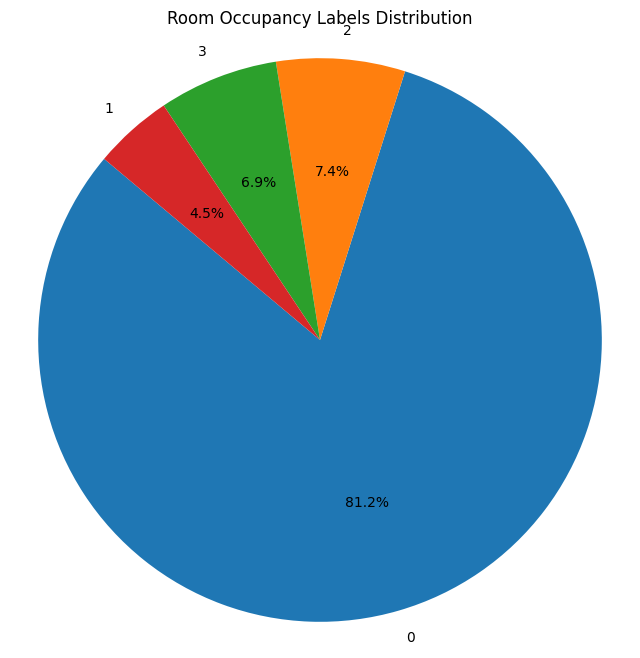

In [ ]:
# Count the occurrences of each room occupancy label
occupancy_counts = data['Room_Occupancy_Count'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(occupancy_counts, labels=occupancy_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Room Occupancy Labels Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

The class is highly imbalanced.

## 6.3. Outliers

In [ ]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns


Boxplots for numerical columns:


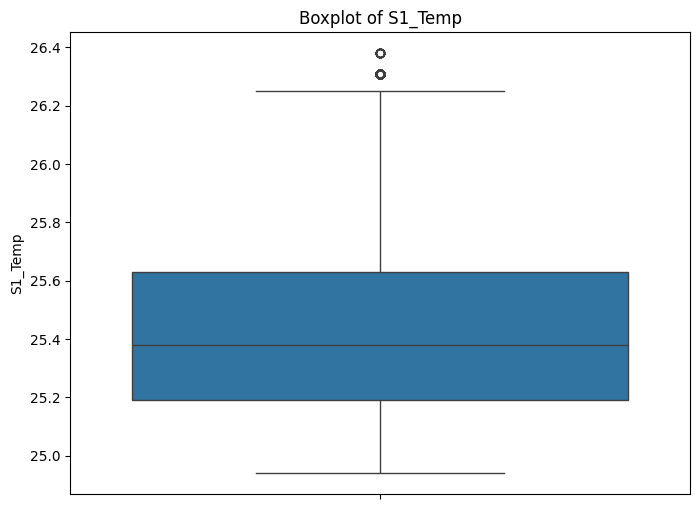

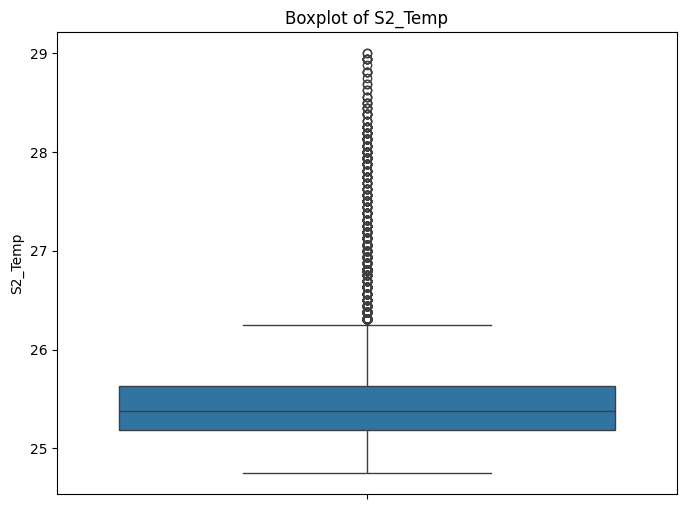

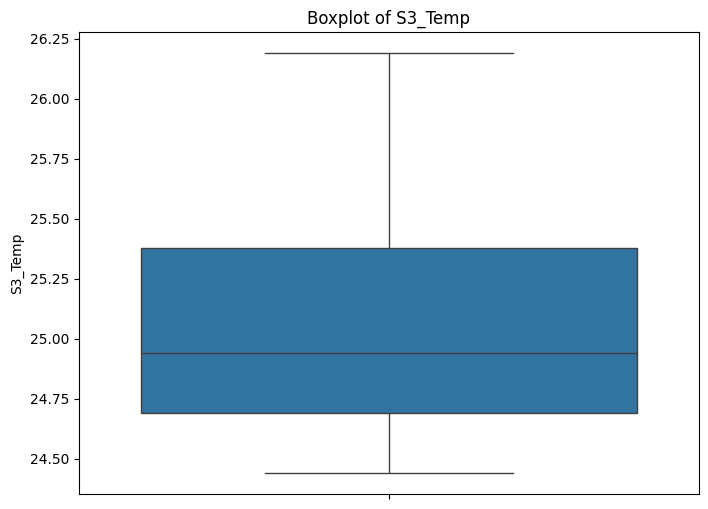

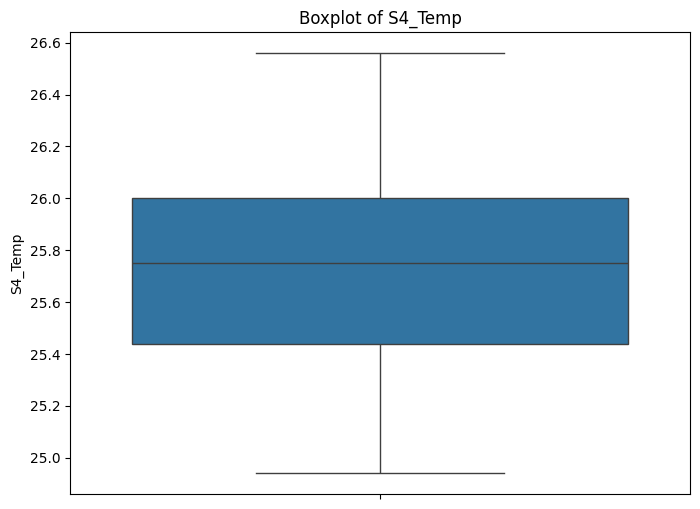

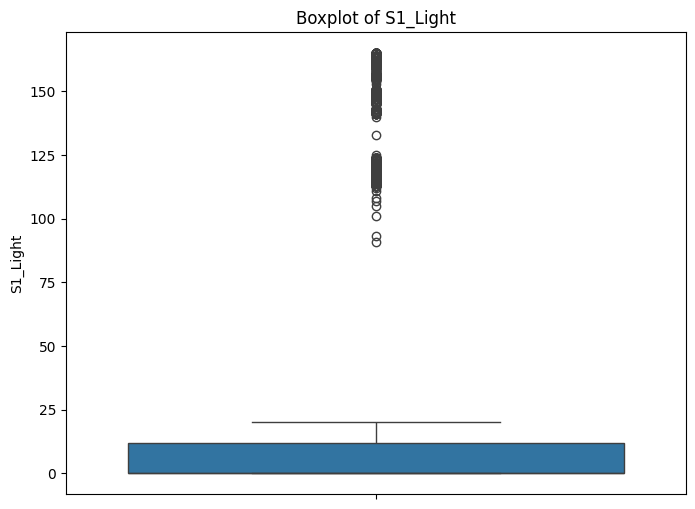

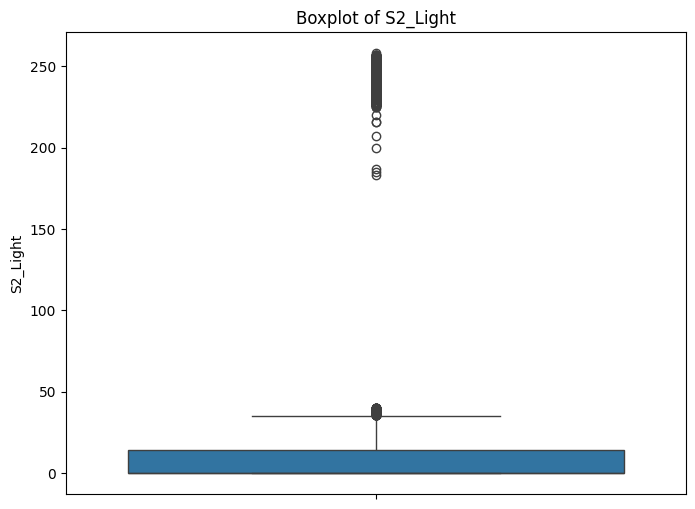

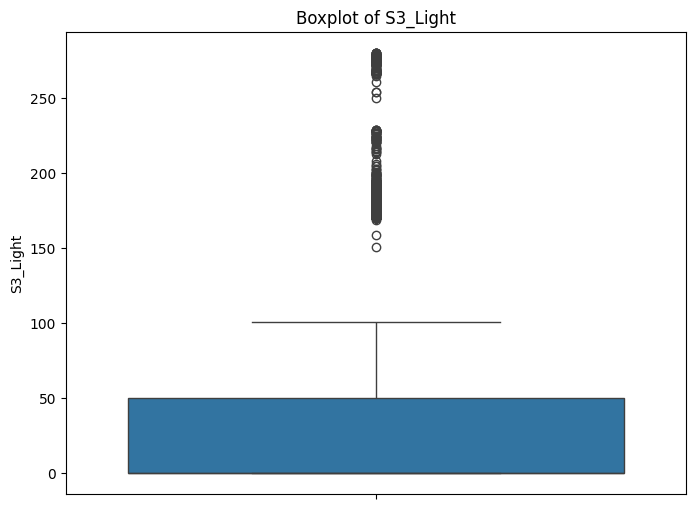

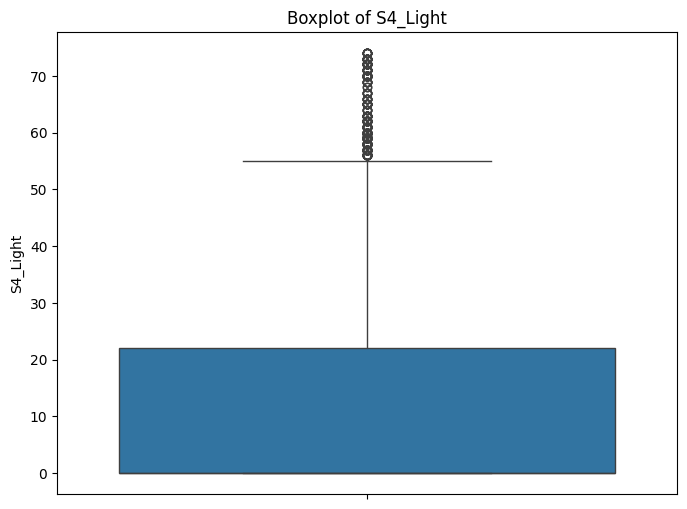

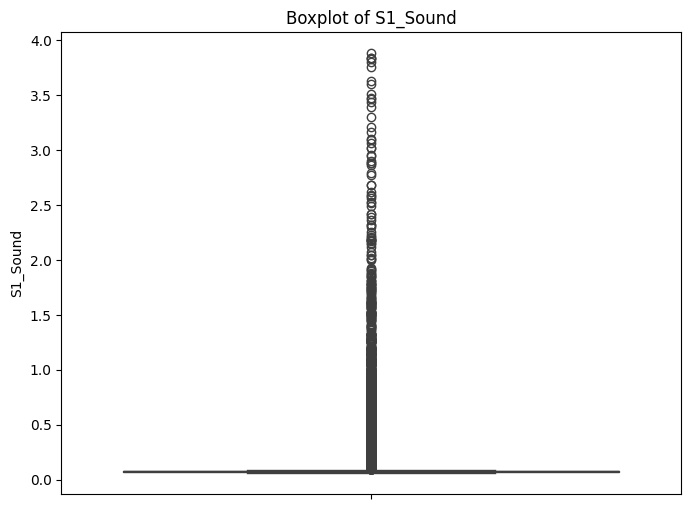

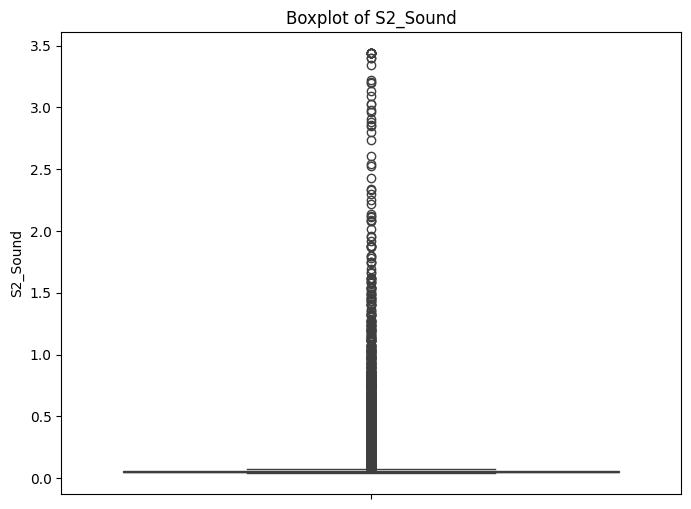

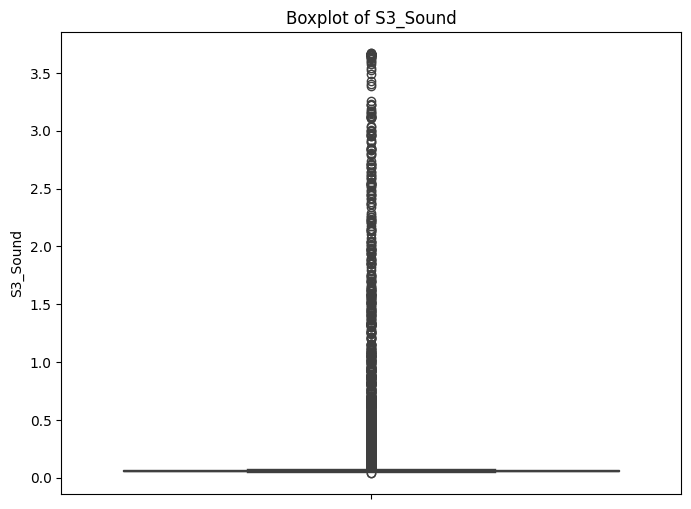

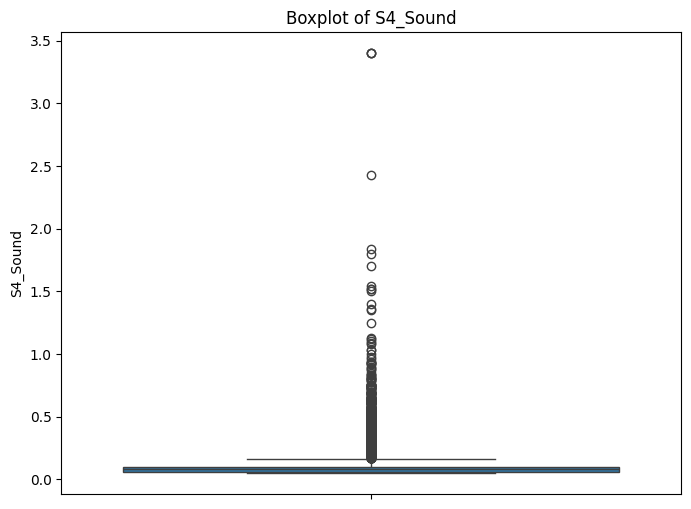

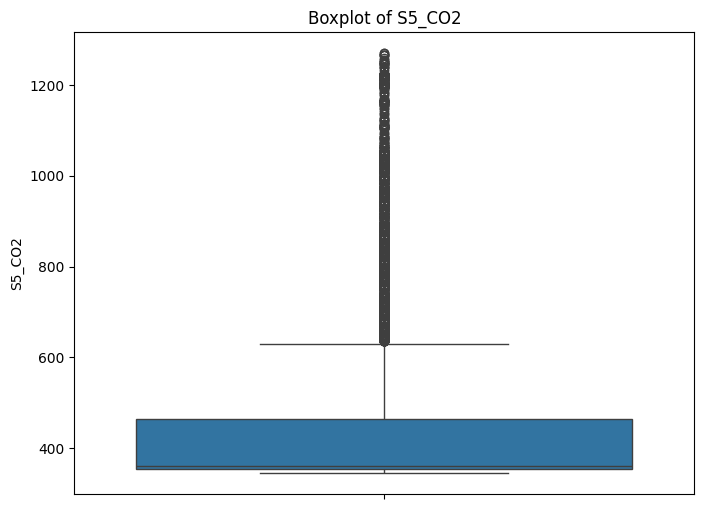

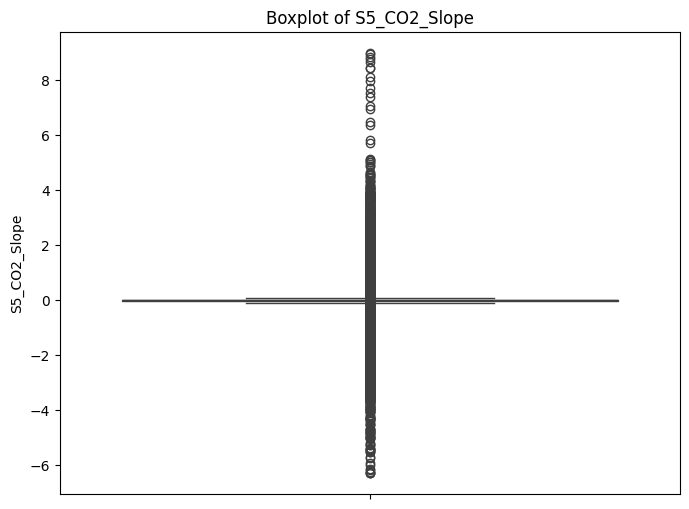

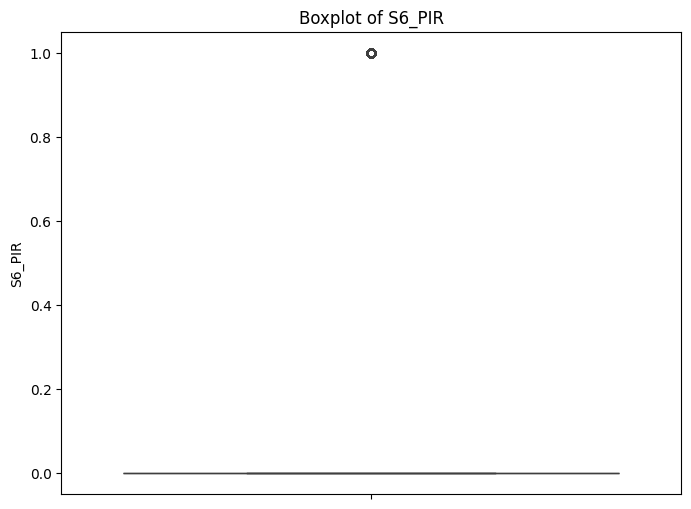

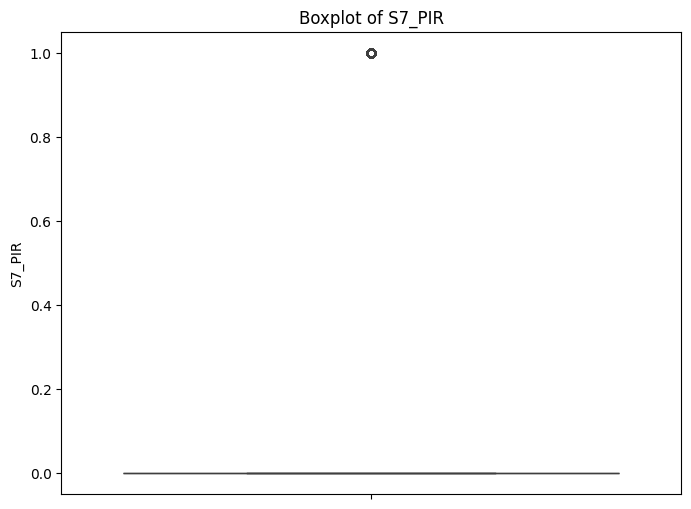

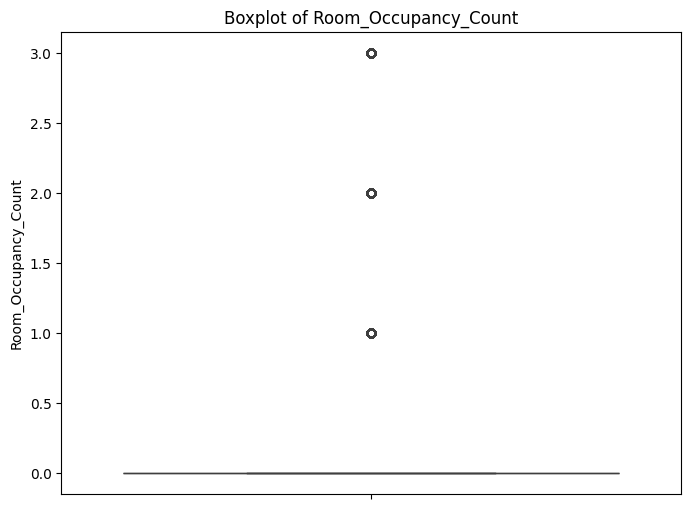

In [ ]:
# Plot boxplots for numerical columns
print("\nBoxplots for numerical columns:")
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, y=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
from scipy.stats import zscore
# Specify the threshold for outlier detection (typically 3)
threshold = 3

# Calculate Z-scores for each data point in the dataset
z_scores = zscore(data[numerical_cols])

# Convert Z-scores to a DataFrame for easier manipulation
z_scores_df = pd.DataFrame(z_scores, columns=data.columns)

# Identify outliers based on Z-scores
outliers = data[(z_scores_df > threshold).any(axis=1)]

# Print the number of outliers detected
print("Number of outliers detected:", len(outliers))

Number of outliers detected: 1537


Given the high count of apparent outliers, we consider that these data points might reflect the actual distribution rather than anomalies. This suggests that the dataset has a broader spread or multiple patterns, indicating that the assumption of outliers is false. And we can train the model based on this distributed data points.

# 7.Preprocessing

## 7.1. Encode the nun numeric features

In [ ]:
encodedData = data.copy()

label_encoder = LabelEncoder()
# Encode the 'Date' column
encodedData['Date'] = label_encoder.fit_transform(encodedData['Date'])
# Encode the 'Time' column
encodedData['Time'] = label_encoder.fit_transform(encodedData['Time'])

## 7.2. Visualise the encoded data

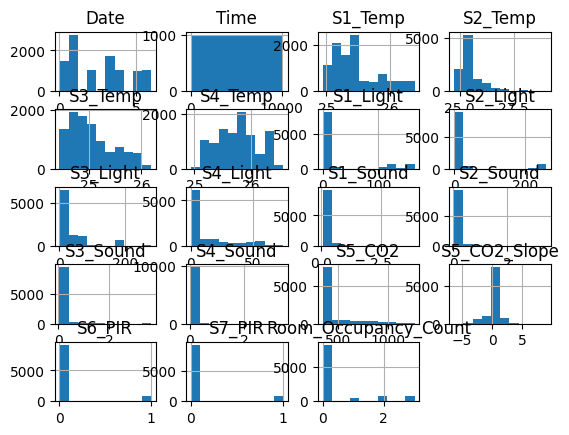

In [ ]:
encodedData.hist()
plt.show()

*   value ranges of axes are different. We need to scale the features






## 7.3. Heatmap

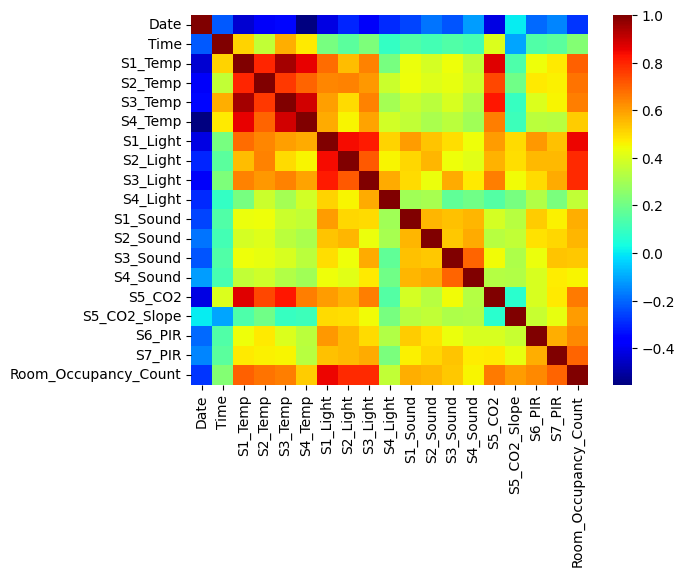

In [ ]:
matrix = matrix = encodedData.corr()
sns.heatmap(matrix,cmap="jet")
plt.show()

It can be observed the certain features are highly correlated with the label

In [ ]:
print("Class distribution before sampling:")
print(encodedData.groupby('Room_Occupancy_Count').size())

Class distribution before sampling:
Room_Occupancy_Count
0    8228
1     459
2     748
3     694
dtype: int64


## 7.4. Scale the features

In [ ]:
scaledData  = encodedData.copy()

X = scaledData.drop(columns=['Room_Occupancy_Count'])
y = scaledData['Room_Occupancy_Count']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
scaled_data = pd.DataFrame(X_scaled, columns=X.columns)

# Combine the scaled features with the label
scaled_data['Room_Occupancy_Count'] = y

print(scaled_data.describe())

               Date          Time       S1_Temp       S2_Temp       S3_Temp  \
count  1.012900e+04  1.012900e+04  1.012900e+04  1.012900e+04  1.012900e+04   
mean   8.979116e-17 -2.244779e-17 -3.434512e-15  5.533380e-15  4.781379e-15   
std    1.000049e+00  1.000049e+00  1.000049e+00  1.000049e+00  1.000049e+00   
min   -1.311813e+00 -1.731880e+00 -1.463033e+00 -1.357775e+00 -1.443193e+00   
25%   -7.923697e-01 -8.659399e-01 -7.514583e-01 -6.073017e-01 -8.580709e-01   
50%   -2.729268e-01  0.000000e+00 -2.106611e-01 -2.832335e-01 -2.729490e-01   
75%    7.659591e-01  8.659399e-01  5.009141e-01  1.431719e-01  7.568655e-01   
max    1.804845e+00  1.731880e+00  2.635640e+00  5.891117e+00  2.652660e+00   

            S4_Temp      S1_Light      S2_Light      S3_Light      S4_Light  \
count  1.012900e+04  1.012900e+04  1.012900e+04  1.012900e+04  1.012900e+04   
mean  -6.779233e-15  8.979116e-17 -1.122390e-17 -4.489558e-17 -1.010151e-16   
std    1.000049e+00  1.000049e+00  1.000049e+00  1.

# 8.Model Development

## 8.1. Split and baance the data set

#### 8.1.1 Split Data to training and testing sets

In [ ]:
print("Class distribution before over-sampling:")
print(scaled_data.groupby('Room_Occupancy_Count').size())

X = (scaledData.drop(columns=['Room_Occupancy_Count'])).values
Y = scaledData['Room_Occupancy_Count'].values

X_train_before_sample, X_test_before_sample, Y_train_before_sample, Y_test_before_sample = train_test_split(X, Y, test_size=0.20, random_state=1)

Class distribution before over-sampling:
Room_Occupancy_Count
0    8228
1     459
2     748
3     694
dtype: int64


#### 8.1.2 Balance data

As the data set is highly imbalanced and the label with the lowest frequency has only bout 450 samples, we opted to oversample the traiing data set.

In [ ]:
# Perform random under-sampling
#rus = RandomUnderSampler(sampling_strategy='all', random_state=42)
#x_resampled, y_resampled = rus.fit_resample(X_train, Y_train)

Y_test = Y_test_before_sample
X_test = X_test_before_sample

# Random over sampling
ros = RandomOverSampler(sampling_strategy='all', random_state=42)
X_train, Y_train = ros.fit_resample(X_train_before_sample, Y_train_before_sample)

# Check the class distribution after under-sampling
print("\nClass distribution after over-sampling:")
encodedLabels, counts = np.unique(Y_train, return_counts=True)

for value, count in zip(encodedLabels, counts):
    print(f"Encoded Label: {value}, Count: {count}")


Class distribution after over-sampling:
Encoded Label: 0, Count: 6590
Encoded Label: 1, Count: 6590
Encoded Label: 2, Count: 6590
Encoded Label: 3, Count: 6590


## 8.2. Statistical Models

### 8.2.1. Xgboost and LGBM

In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, f1_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

def train_and_evaluate_classifiers(X_train, X_test, Y_train, Y_test):
    classifiers = {
        "XGBoost": XGBClassifier(),
        "LightGBM": LGBMClassifier()
    }

    results = {}

    for clf_name, clf in classifiers.items():
        print(f"Training and evaluating {clf_name}...")
        clf.fit(X_train, Y_train)
        y_pred = clf.predict(X_test)

        accuracy = accuracy_score(Y_test, y_pred)
        auc = roc_auc_score(Y_test, clf.predict_proba(X_test), multi_class='ovr')
        cm = confusion_matrix(Y_test, y_pred)
        cr = classification_report(Y_test, y_pred)
        f1 = f1_score(Y_test, y_pred, average='weighted')

        results[clf_name] = {"Accuracy": accuracy, "AUC": auc, "Confusion Matrix": cm,
                             "Classification Report": cr, "F1 Score": f1}

        print(f"{clf_name} - Accuracy: {accuracy}, AUC: {auc}, F1 Score: {f1}")
        print("Confusion Matrix:")
        print(cm)
        print("Classification Report:")
        print(cr)
        print("=" * 50)

    return results

# Call the function with your data
results = train_and_evaluate_classifiers(X_train, X_test, Y_train, Y_test)


Training and evaluating XGBoost...
XGBoost - Accuracy: 0.9985192497532083, AUC: 0.9999921162354938, F1 Score: 0.9985201500818863
Confusion Matrix:
[[1638    0    0    0]
 [   0   82    1    0]
 [   0    0  153    1]
 [   0    0    1  150]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1638
           1       1.00      0.99      0.99        83
           2       0.99      0.99      0.99       154
           3       0.99      0.99      0.99       151

    accuracy                           1.00      2026
   macro avg       1.00      0.99      0.99      2026
weighted avg       1.00      1.00      1.00      2026

Training and evaluating LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017603 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1962
[LightGBM] [Info] Number of data points in the train set: 26360, numbe

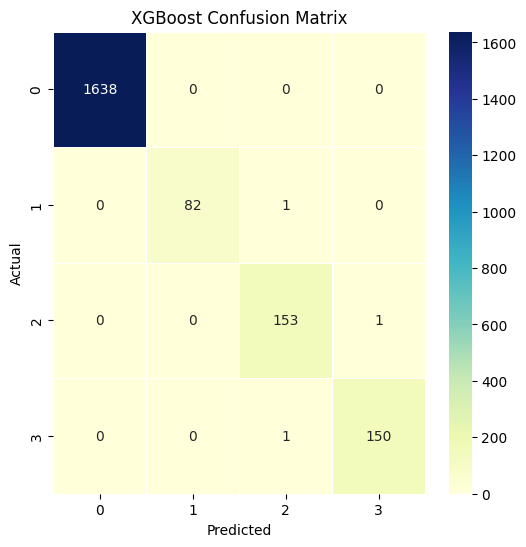

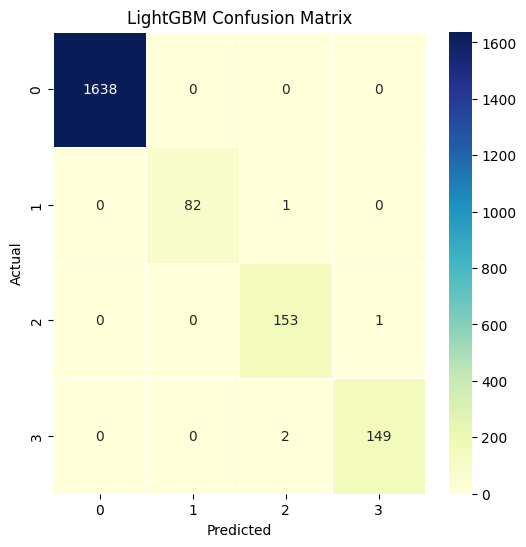

In [ ]:
# Plotting confusion matrix for XGBoost
plt.figure(figsize=(6, 6))
sns.heatmap(results["XGBoost"]["Confusion Matrix"], annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plotting confusion matrix for LightGBM
plt.figure(figsize=(6, 6))
sns.heatmap(results["LightGBM"]["Confusion Matrix"], annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)
plt.title("LightGBM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 8.2.2. Random Forest

In [ ]:
# Function to plot the confuction matrix
def plotConfMatrix(conf_matrix):
  plt.figure(figsize=(4, 3))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

#### 8.2.2.1 Build & Run the model

Accuracy: 0.9985192497532083
AUC: 0.99998688147761


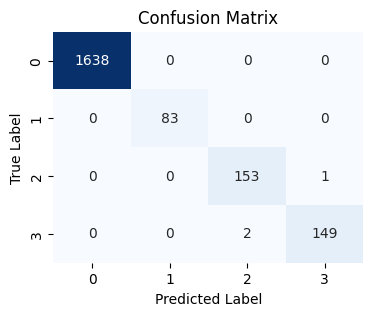


Classification Report
-----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1638
           1       1.00      1.00      1.00        83
           2       0.99      0.99      0.99       154
           3       0.99      0.99      0.99       151

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



In [ ]:
def run_rf_model(X_train,X_test,Y_train,Y_test):
  rf_classifier = RandomForestClassifier(random_state=1)
  rf_classifier.fit(X_train, Y_train)

  y_pred = rf_classifier.predict(X_test)

  # Calculate the accuracy
  accuracy = accuracy_score(Y_test, y_pred)
  print("Accuracy:", accuracy)

  # Calculate the predicted probabilities for each class
  y_pred_proba = rf_classifier.predict_proba(X_test)

  # Calculate the AUC
  auc = roc_auc_score(Y_test, y_pred_proba, multi_class='ovr')
  print("AUC:", auc)

  # Compute and print the confusion matrix
  plotConfMatrix(confusion_matrix(Y_test, y_pred))

  report = classification_report(Y_test, y_pred)

  print('\nClassification Report')
  print('-----------------------')
  print(report)

  return  y_pred, rf_classifier

y_pred, model = run_rf_model(X_train,X_test,Y_train,Y_test)

#### 8.2.2.2 Convergence Test

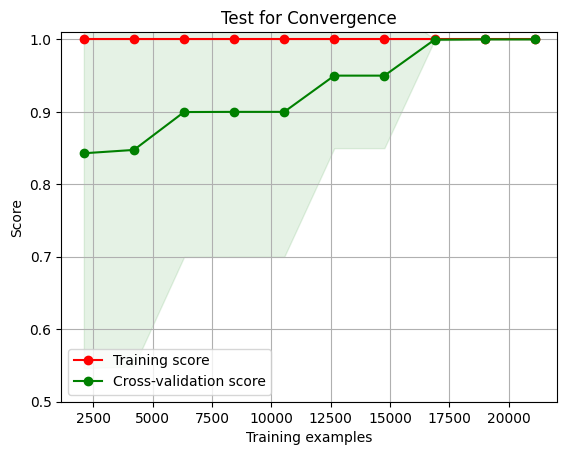

In [ ]:
def convergenceTest(model,X_in, Y_in):
    # Perform grid search cross-validation
    train_sizes, train_scores, test_scores = learning_curve(model, X_in, Y_in, cv=5, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    #ylim = None
    ylim = (0.5, 1.01)
    plt.figure()
    plt.title('Test for Convergence')
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    return

convergenceTest(RandomForestClassifier(random_state=1),X_train,Y_train)

## 8.3. Neural Network

In [ ]:
##Importing Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Perform oversampling on the training data only
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)

# Check the class distribution after over-sampling
print("\nClass distribution after over-sampling:")
encodedLabels, counts = np.unique(y_train_resampled, return_counts=True)
for value, count in zip(encodedLabels, counts):
    print(f"Encoded Label: {value}, Count: {count}")


Class distribution after over-sampling:
Encoded Label: 0, Count: 6609
Encoded Label: 1, Count: 6609
Encoded Label: 2, Count: 6609
Encoded Label: 3, Count: 6609


In [ ]:
# Performing One Hot Encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_resampled)
y_train_one_hot = to_categorical(y_train_encoded)

In [ ]:
# Define the neural network architecture
model = Sequential([
    Dense(64, input_shape=(x_train.shape[1],), activation='relu'),  # Input layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dropout(0.2),  # Adding dropout for regularization
    Dense(4, activation='softmax')  # Output layer with 4 neurons and softmax activation for multi-class classification
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train_resampled, y_train_one_hot, epochs=50, batch_size=64, validation_split=0.2, verbose=0)

In [ ]:
# Get the training and validation accuracy from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Print the last epoch's training and validation accuracy
print("\nTraining Accuracy:", train_accuracy[-1])
print("Validation Accuracy:", val_accuracy[-1])


Training Accuracy: 0.9995744228363037
Validation Accuracy: 0.9977307319641113


In [ ]:
# Evaluate the model on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
accuracy = accuracy_score(y_test, y_pred_classes)
print("Test Accuracy:", accuracy)

64/64 [==============================] - 0s 1ms/step
Test Accuracy: 0.9965449160908193


In [ ]:
def calculate_metrics(y_true, y_pred):
    # Calculating precision
    precision = precision_score(y_true, y_pred, average='weighted')

    # Calculating recall
    recall = recall_score(y_true, y_pred, average='weighted')

    # Calculating F1 score
    f1 = f1_score(y_true, y_pred, average='weighted')

    return precision, recall, f1

In [ ]:
# Calling the function with true labels and predicted labels
precision, recall, f1 = calculate_metrics(y_test, y_pred_classes)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9965845033301434
Recall: 0.9965449160908193
F1 Score: 0.9965540686581997


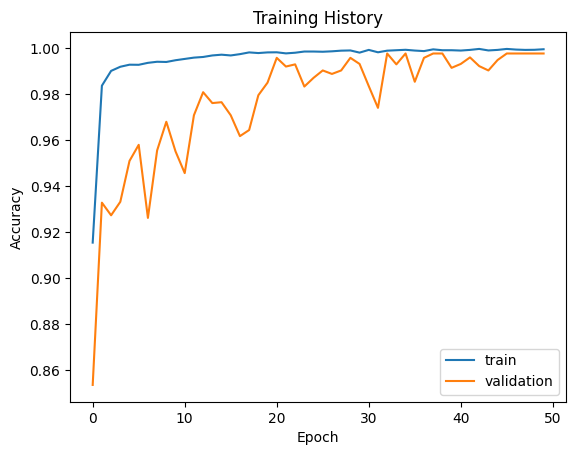

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Compute the overall AUC
overall_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
print("Overall AUC:", overall_auc)

Overall AUC: 0.9999355513209923


## 8.4. CNN

In [ ]:
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import roc_auc_score
from tensorflow.keras.optimizers import Adam

In [ ]:
def createCNN(input_shape, filters=32, dense_units=64, classes=4): # 4 output classes
    model = Sequential([
        Conv1D(filters, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(dense_units, activation='relu'),
        Dense(classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
def runCNN(X_frames, Y_frames, createCNN_func):

    # Split data into training and testing sets
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_frames, Y_frames, test_size=0.2, random_state=42)

     # Reshape the input data
    X_trn = np.expand_dims(X_trn, axis=-1)
    X_tst = np.expand_dims(X_tst, axis=-1)

    # Get input shape for the CNN model
    input_shape = X_trn[0].shape

    print(input_shape)

    # Create and compile the CNN model
    model = createCNN_func(input_shape)

    # Train the CNN model with early stopping
    history = model.fit(X_trn, Y_trn, epochs=50, batch_size=32, validation_split=0.1)

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_tst, Y_tst)
    print("Test accuracy:", test_acc)

    Y_prob = model.predict(X_tst)

    # Predict classes for the test set
    Y_pred = np.argmax(model.predict(X_tst), axis=1)

    # Calculate precision
    precision = precision_score(Y_tst, Y_pred, average='weighted')

    # Calculate recall
    recall = recall_score(Y_tst, Y_pred, average='weighted')

    # Calculate F1 score
    f1 = f1_score(Y_tst, Y_pred, average='weighted')

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    # Compute the overall AUC
    overall_auc = roc_auc_score(Y_tst, Y_prob, multi_class='ovr')
    print("Overall AUC:", overall_auc)

    return history

In [ ]:
cnn_history = runCNN(X_train, Y_train, createCNN_func = createCNN)

(18, 1)
Epoch 1/50
594/594 [==============================] - 2s 3ms/step - loss: 4.8673 - accuracy: 0.8043 - val_loss: 1.1231 - val_accuracy: 0.8862
Epoch 2/50
594/594 [==============================] - 1s 2ms/step - loss: 1.4809 - accuracy: 0.8899 - val_loss: 1.8694 - val_accuracy: 0.9004
Epoch 3/50
594/594 [==============================] - 2s 3ms/step - loss: 1.1778 - accuracy: 0.9140 - val_loss: 5.0614 - val_accuracy: 0.7719
Epoch 4/50
594/594 [==============================] - 2s 4ms/step - loss: 1.2703 - accuracy: 0.9225 - val_loss: 0.4883 - val_accuracy: 0.9502
Epoch 5/50
594/594 [==============================] - 4s 6ms/step - loss: 0.8465 - accuracy: 0.9423 - val_loss: 0.9711 - val_accuracy: 0.9569
Epoch 6/50
594/594 [==============================] - 3s 6ms/step - loss: 0.7580 - accuracy: 0.9434 - val_loss: 0.9012 - val_accuracy: 0.9350
Epoch 7/50
594/594 [==============================] - 5s 8ms/step - loss: 0.8939 - accuracy: 0.9428 - val_loss: 0.2685 - val_accuracy: 0.973

In [ ]:
def createCNN_2(input_shape, filters=32, dense_units=256, classes=4): # 4 output classes
    model = Sequential([
        Conv1D(filters, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(dense_units, activation='leaky_relu'),
        Dense(classes, activation='softmax')
    ])
    optimizer = Adam(learning_rate=0.01)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
cnn_history = runCNN(X_train, Y_train, createCNN_func = createCNN_2)

(18, 1)
Epoch 1/50
594/594 [==============================] - 3s 4ms/step - loss: 27.5337 - accuracy: 0.8435 - val_loss: 0.2593 - val_accuracy: 0.8805
Epoch 2/50
594/594 [==============================] - 2s 4ms/step - loss: 0.1013 - accuracy: 0.9684 - val_loss: 0.0736 - val_accuracy: 0.9815
Epoch 3/50
594/594 [==============================] - 2s 4ms/step - loss: 0.0852 - accuracy: 0.9735 - val_loss: 0.0883 - val_accuracy: 0.9697
Epoch 4/50
594/594 [==============================] - 4s 6ms/step - loss: 0.1573 - accuracy: 0.9518 - val_loss: 0.1099 - val_accuracy: 0.9516
Epoch 5/50
594/594 [==============================] - 3s 4ms/step - loss: 0.1022 - accuracy: 0.9646 - val_loss: 0.0833 - val_accuracy: 0.9825
Epoch 6/50
594/594 [==============================] - 2s 4ms/step - loss: 0.1073 - accuracy: 0.9668 - val_loss: 0.1753 - val_accuracy: 0.9246
Epoch 7/50
594/594 [==============================] - 2s 4ms/step - loss: 0.1137 - accuracy: 0.9650 - val_loss: 0.0849 - val_accuracy: 0.97

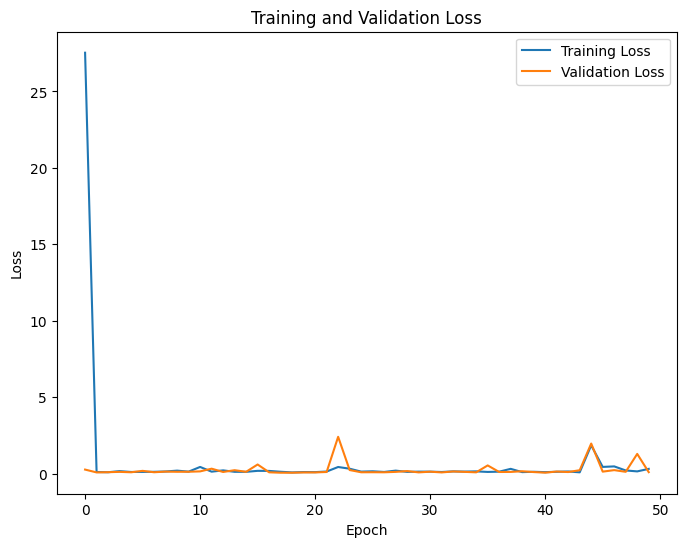

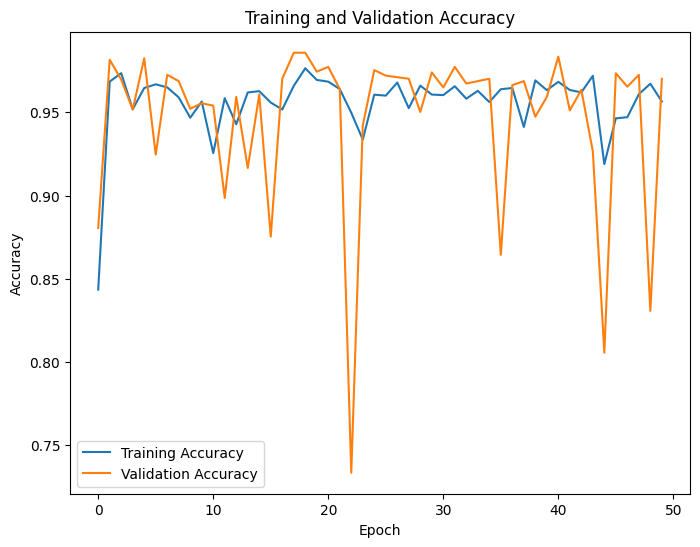

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Function to plot training and validation loss
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

# Function to plot training and validation accuracy
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

# Plot the training and validation loss
plot_loss(cnn_history)

# Plot the training and validation accuracy
plot_accuracy(cnn_history)

# 9.Principle Component Analysis

In [ ]:
n_components = [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 18]  # Number of principal components to consider
explained_variance_ratio = []  # List to store explained variance ratio for each number of components

for n in n_components:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train RandomForestClassifier
    rf_classifier = RandomForestClassifier(random_state=1)
    start_time = time.time()
    rf_classifier.fit(X_train_pca, Y_train)
    end_time = time.time()

    # Calculate accuracy
    accuracy = accuracy_score(Y_test, rf_classifier.predict(X_test_pca))

    # Calculate explained variance ratio
    explained_variance_ratio.append(sum(pca.explained_variance_ratio_))

    print(f"Number of components: {n}, Accuracy: {accuracy:.4f}, Time: {end_time - start_time:.4f} seconds")

Number of components: 1, Accuracy: 0.7419, Time: 3.2913 seconds
Number of components: 2, Accuracy: 0.9926, Time: 1.7169 seconds
Number of components: 3, Accuracy: 0.9980, Time: 1.5149 seconds
Number of components: 4, Accuracy: 0.9970, Time: 2.1008 seconds
Number of components: 5, Accuracy: 0.9975, Time: 2.9564 seconds
Number of components: 6, Accuracy: 0.9980, Time: 2.0687 seconds
Number of components: 8, Accuracy: 0.9975, Time: 2.1806 seconds
Number of components: 10, Accuracy: 0.9975, Time: 2.9108 seconds
Number of components: 12, Accuracy: 0.9975, Time: 3.8061 seconds
Number of components: 14, Accuracy: 0.9980, Time: 3.4718 seconds
Number of components: 16, Accuracy: 0.9970, Time: 4.8132 seconds
Number of components: 18, Accuracy: 0.9980, Time: 5.0824 seconds


It can be observed that after 4 features, there is not much of an improvement in accuracy.

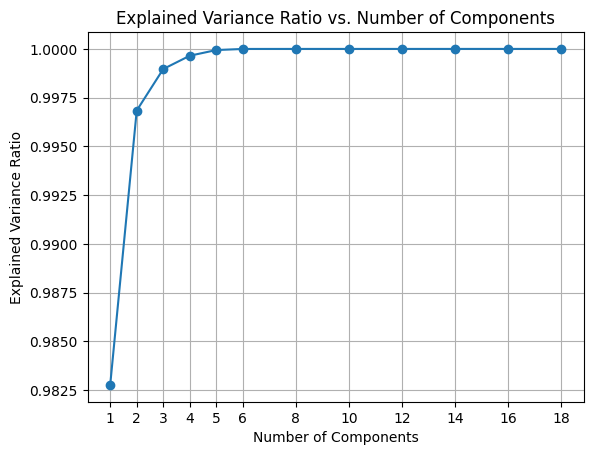

In [ ]:
plt.plot(n_components, explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.xticks(n_components)
plt.grid(True)
plt.show()

In this case,  the explained variance ratio becomes close to 1 after including 5 principal components, it suggests that these components capture almost all of the variance in the dataset.

However, there is no significant improvement in accuracy beyond 4 principal components. Hence, we can consider selecting 4 components, which provides a  balance between capturing variance and reducing dimensionality.

# 10.Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel
pipe = make_pipeline(
    SelectFromModel(RandomForestClassifier(random_state=1), max_features=10),
    RandomForestClassifier(random_state=1)
)

# Fit the pipeline on the training data
pipe.fit(X_train, Y_train)

# Access the SelectFromModel transformer
selector = pipe.named_steps['selectfrommodel']

# Get the boolean mask of selected features
selected_features_mask = selector.get_support()

# Get the names of the selected features
selected_features_names = [columnLabels[i] for i, selected in enumerate(selected_features_mask) if selected]

print("Selected features:", selected_features_names)

Selected features: ['S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 'S5_CO2']


This shows that we accurate prediction can be carried out using five features 'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 'S5_CO2'

** Accuracy using selected features**

Accuracy: 0.9975320829220138
AUC: 0.9999571124239999


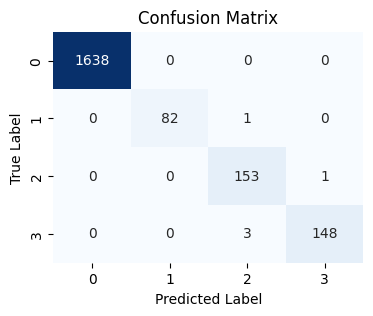


Classification Report
-----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1638
           1       1.00      0.99      0.99        83
           2       0.97      0.99      0.98       154
           3       0.99      0.98      0.99       151

    accuracy                           1.00      2026
   macro avg       0.99      0.99      0.99      2026
weighted avg       1.00      1.00      1.00      2026



In [ ]:
featureNames = ['S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 'S5_CO2']

column_indices = [columnLabels.index(col) for col in featureNames]
X_s_train = X_train[:, column_indices]
X_s_test = X_test[:, column_indices]
Y_s_train, Y_s_test = Y_train, Y_test

y_s_pred, model_s = run_rf_model(X_s_train, X_s_test, Y_s_train, Y_s_test)


                      With all features --->  With selected features
                      -------------------------------------------
*   Accuracy ---------    0.99851  --->   0.99753  
*   AUC     ----------  0.99998  --->   0.99995

Accuracy: 0.9945652173913043
AUC: 0.9999153112469406



# 11.Explaination of Decisions

In [ ]:
x_selected_df = pd.DataFrame(X_s_test, columns=featureNames)
y_selected_df = pd.DataFrame(Y_s_test, columns=['Actual'])
y_pred_df = pd.DataFrame(y_s_pred, columns=['Predicted'])

# Concatenate the DataFrames horizontally
result_df = pd.concat([x_selected_df, y_selected_df, y_pred_df], axis=1)

# Print the result
print(result_df.iloc[33:36])
print('')
print(result_df.iloc[29:30])
print('')
print(result_df.iloc[168:169])
print('')
print(result_df.iloc[183:184])
print('')
print(result_df.iloc[32:33])

    S1_Light  S2_Light  S3_Light  S4_Light  S5_CO2  Actual  Predicted
33     117.0      21.0      27.0      20.0   505.0       1          1
34       0.0       0.0       0.0       0.0   355.0       0          0
35     161.0     252.0      81.0      61.0   475.0       2          2

    S1_Light  S2_Light  S3_Light  S4_Light  S5_CO2  Actual  Predicted
29     149.0     235.0     180.0      10.0  1165.0       3          3

     S1_Light  S2_Light  S3_Light  S4_Light  S5_CO2  Actual  Predicted
168       9.0       9.0      52.0      31.0   380.0       3          3

     S1_Light  S2_Light  S3_Light  S4_Light  S5_CO2  Actual  Predicted
183       7.0       6.0      37.0      24.0   515.0       3          3

    S1_Light  S2_Light  S3_Light  S4_Light  S5_CO2  Actual  Predicted
32      10.0      11.0      57.0      36.0   370.0       3          3


*   Line 34: All the lights (S1, S2, S3 and S4) has zero occupancy. When we look at the data, it can be identified that CO2 level hovers aroud 350 when occupancy is 0.  Even when the occupancy is above 350, when all four lights hover around 0, the occupancy is 0.
*   Line 35:  Two lights (S1 and S2) has significantly higher occupancy than the other two (S3 and S4). Occupancy is identified as 2
*   Line 33:  One lights (S1) has significantly higher occupancy than the other three (S2, S3 and S4). Occupancy is identified as 1
*   Line 29: Three lights (S1, S2, and S3) has significantly higher occupancy than the other (S4). Hence, the occupancy is identified as 3.

These predictions depends on the readings from four lights, when the decision is inconclusive only with the lights, CO2 reading plays a significant role. For exapmple, when the CO2 level is around 350 (with a variation around 5) the occupancy is 0 irrespective of four light readings.


*   List 32, 168, 183: When all three lights giving lowvalues (below 100) and the CO2 level is above 350, the occupancy prediction is 3.



When the three light readings do not have a significant differece in their values, CO2 level assists the reading.












# 12.Convergence

In [ ]:
def convergenceTest(x_in, y_in, split, model):
    Xf_train, Xf_test, Yf_train, Yf_test = train_test_split(x_in, y_in, test_size=split, random_state=42)

    # Perform grid search cross-validation
    pipe = make_pipeline(PCA(n_components=5),model)

    train_sizes, train_scores, test_scores = learning_curve(pipe, Xf_train, Yf_train, cv=10, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ylim = None
    plt.figure()
    plt.title('Test for Convergence')
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    return

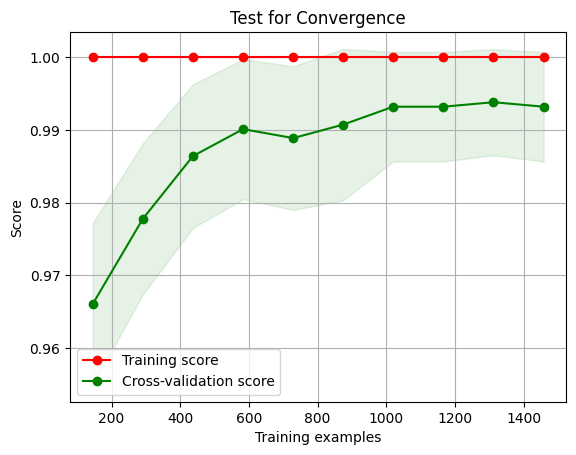

In [ ]:
convergenceTest(x_selected_df, y_selected_df, 0.2, RandomForestClassifier(random_state=1))

This result shows that our model is converging and we need more samples to achieve a better convergence.